In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
classes = np.genfromtxt('training/labels/classes.txt',dtype='str')
classes

array(['door', 'window', 'zone'], dtype='<U6')

# Read and Plot data

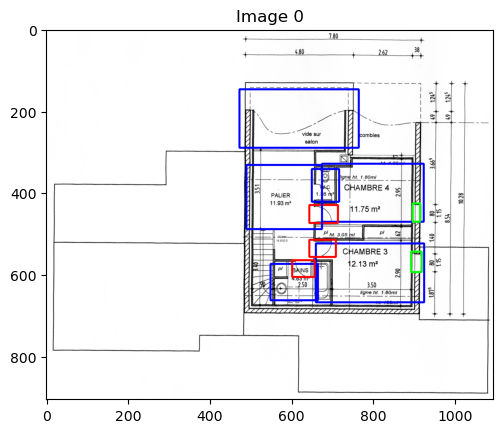

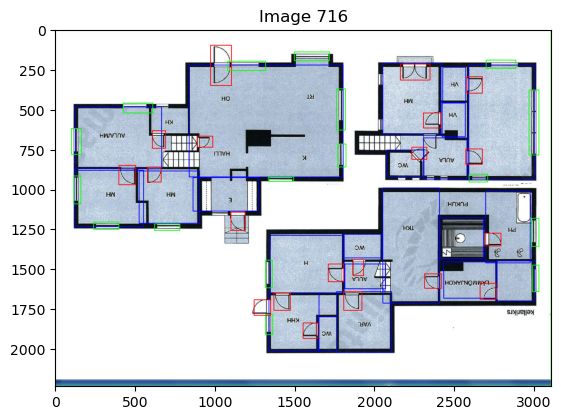

In [3]:
def get_data(img_id):
    data = np.loadtxt("training/labels/%d.txt" %img_id)
    img = cv2.imread("training/images/%d.png" % img_id)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    labels = data[:, 0]
    boxes = data[:, 1:]
    labels = labels.astype(np.int8)
    return img, labels, boxes

def plot_data(img, labels, boxes):
    boxes[:,0] = boxes[:,0] * img.shape[1]
    boxes[:,1] = boxes[:,1] * img.shape[0]
    boxes[:,2] = boxes[:,2] * img.shape[1]
    boxes[:,3] = boxes[:,3] * img.shape[0]
    boxes[:,0] -= boxes[:,2]/2
    boxes[:,1] -= boxes[:,3]/2
    boxes[:,2] += boxes[:,0]
    boxes[:,3] += boxes[:,1]
    boxes = np.round(boxes).astype(np.int32)
    
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]


    for label, box in zip(labels, boxes):
        cv2.rectangle(img,
                      (box[0], box[1]),
                      ( box[2], box[3]),
                      colors[label], 3)

    plt.imshow(img)
    

def plot_img(img_id):
    img, labels, boxes = get_data(img_id)
    plot_data(img, labels, boxes)
    plt.title("Image %d" %img_id)
    plt.show()
    
plot_img(0)
plot_img(716)